In [1]:
#import the packages "Pandas" and "MatPlotLib" into Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#We import the stock data of Facebook into Jupyter Notebook. The CSV file is located in the folder called "Data" in your Workspace
#We then name the DataFrame name as 'fb'
#fb = yf.DataFrame.from_csv('../data/facebook.csv')
#fb.head()

In [3]:
# yahoo finance is used to fetch data
import yfinance as yf
# Read data
fb = yf.download('FB')
ms = yf.download('MSFT')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,337.049988,339.450012,333.559998,337.679993,337.679993,30427600
2021-11-24,336.279999,338.160004,333.910004,337.910004,337.910004,21661300
2021-11-26,334.350006,337.929993,328.119995,329.679993,329.679993,24217200
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42833700


In [5]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-23,338.929993,341.399994,333.500000,337.250000,337.250000,17225000
2021-11-24,336.000000,341.779999,332.809998,341.059998,341.059998,13566200
2021-11-26,335.799988,337.750000,331.899994,333.119995,333.119995,14750700
2021-11-29,336.890015,340.670013,335.309998,338.029999,338.029999,16650900
2021-11-30,335.000000,335.809998,323.429993,324.459991,324.459991,25348500


# Create a new column in the DataFrame (1) - Price difference

In [6]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [7]:
#Create a new column PriceDiff in the DataFrame fb
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [8]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6800003051757812


In [9]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(fb['PriceDiff'].loc['2015-01-05'])

-1.0400009155273438


In [10]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(fb['PriceDiff'].loc['2021-11-29'])

-13.57000732421875


## Create a new column in the DataFrame (2) - Daily return
Daily Return is calcuated as PriceDiff/Close

In [11]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff'] /fb['Close']

In [12]:
#Your turn to create a new column Return in the DataFrame MS
ms['Return'] = ms['PriceDiff'] /ms['Close']

In [13]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2021-11-29'])

-0.01794257332178253


##  Create a new column in the DataFrame using List Comprehension - Direction

In [14]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [15]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index ]

In [16]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2021-01-05', ms['PriceDiff'].loc['2021-01-05'], ms['Direction'].loc['2021-01-05']))

Price difference on 2021-01-05 is -5.649993896484375. direction is 0


## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

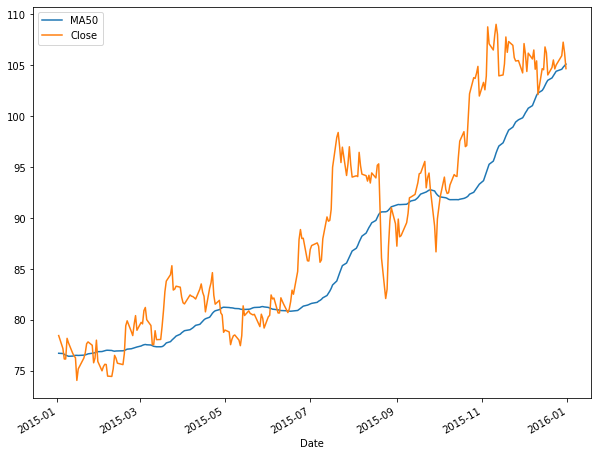

In [17]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

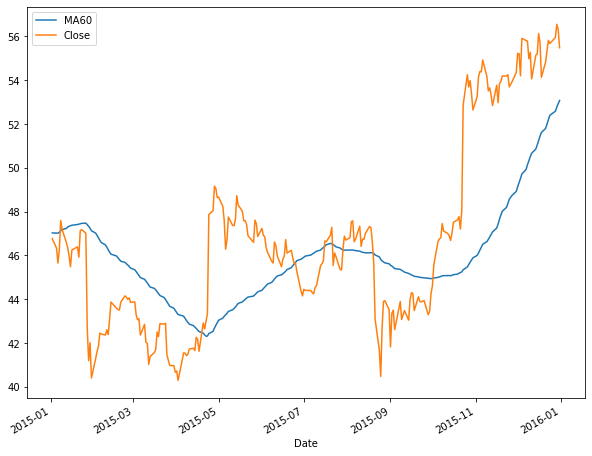

In [18]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()